<a href="https://colab.research.google.com/github/Selvasaranya2025/Police_log/blob/main/multidisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
kidney_df = pd.read_csv('/content/kidney_disease - kidney_disease.csv')
liver_df = pd.read_csv('/content/indian_liver_patient - indian_liver_patient.csv')
parkinsons_df = pd.read_csv('/content/parkinsons - parkinsons.csv')

In [4]:
# Preview the data
print("Initial shape:", liver_df.shape)
liver_df.head(10)

Initial shape: (583, 11)


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [5]:
liver_df['Dataset'].value_counts()

,count
Dataset,
1,416
2,167


In [6]:
#check for duplicates
print("\n duplicate values:", liver_df.duplicated().sum())



 duplicate values: 13


In [7]:
# Shape and preview
liver_df.shape




(583, 11)

In [8]:

# Check null values column-wise
liver_df.isna().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


In [9]:

# Check total NaNs in the dataset
liver_df.isna().sum().sum()



np.int64(4)

In [10]:
# Check fully NaN rows
liver_df[liver_df.isna().all(axis=1)]


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [11]:

# Count of fully NaN rows
liver_df.isna().all(axis=1).sum()

np.int64(0)

In [12]:
# Drop Fully Empty Rows
liver_df = liver_df.dropna(how='all')

In [13]:
liver_df['Albumin_and_Globulin_Ratio'].isna().sum()
liver_df['Albumin_and_Globulin_Ratio'].describe()

,Albumin_and_Globulin_Ratio
count,579.000000
mean,0.947064
std,0.319592
min,0.300000
25%,0.700000
50%,0.930000
75%,1.100000
max,2.800000


In [14]:
liver_df['Albumin_and_Globulin_Ratio'].fillna(liver_df['Albumin_and_Globulin_Ratio'].median(), inplace=True)

In [15]:
# Check duplicates
liver_df.duplicated().sum()

np.int64(13)

In [16]:
# Drop them
liver_df = liver_df.drop_duplicates()

In [17]:
# Final shape
liver_df.shape

(570, 11)

In [18]:
print(liver_df.dtypes)


Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object


In [19]:
liver_df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [20]:
liver_df['Dataset'].value_counts()

,count
Dataset,
1,406
2,164


In [21]:
#preprocessing label encoder
#for object coloums
le = LabelEncoder()
liver_df['Gender'] = le.fit_transform(liver_df['Gender'])



In [22]:
liver_df['Dataset'].value_counts()

,count
Dataset,
1,406
2,164


In [23]:
# Convert 1 (has disease) → 1
# Convert 2 (no disease) → 0
liver_df['Dataset'] = liver_df['Dataset'].replace({2: 0})

In [24]:
#save clean preprocessed liverdisease data
liver_df.to_csv('liver_disease_clean.csv', index=False)


In [25]:
liver_df['Dataset'].value_counts()

,count
Dataset,
1,406
0,164


### kidney preprocessing

In [26]:
#preprocessing kidney
print("Initial shape:", kidney_df.shape)

print("missing values:\n", kidney_df.isnull().sum())


Initial shape: (400, 26)
missing values:
 id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


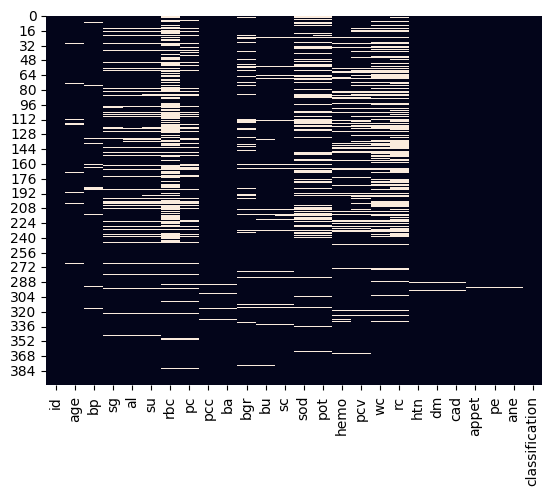

In [27]:
# Check for missing values
kidney_df.isnull().sum()

# Visualize missing data
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(kidney_df.isnull(), cbar=False)
plt.show()


In [28]:
# Count of fully NaN rows
kidney_df.isna().all(axis=1).sum()

np.int64(0)

In [29]:
# Drop Fully Empty Rows
kidney_df = kidney_df.dropna(how='all')

In [30]:
# Check total NaNs in the dataset
kidney_df.isna().sum().sum()


np.int64(1009)

In [31]:
import numpy as np

# Replace '?' with NaN
kidney_df.replace('?', np.nan, inplace=True)

In [32]:
kidney_df['pcv'] = pd.to_numeric(kidney_df['pcv'], errors='coerce')
kidney_df['wc'] = pd.to_numeric(kidney_df['wc'], errors='coerce')
kidney_df['rc'] = pd.to_numeric(kidney_df['rc'], errors='coerce')

In [33]:
# Numerical columns
numeric_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

# Binary categorical columns (yes/no, good/poor etc.)
binary_categoricals = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Target column
target_col = 'classification'

In [34]:
# Fill numeric columns with median
for col in numeric_cols:
    kidney_df[col] = kidney_df[col].fillna(kidney_df[col].median())

# Fill binary categorical columns with mode
for col in binary_categoricals:
    kidney_df[col] = kidney_df[col].fillna(kidney_df[col].mode()[0])

In [35]:
#label encoding for binary
label_encoders = {}

for col in binary_categoricals:
    le = LabelEncoder()
    kidney_df[col] = le.fit_transform(kidney_df[col])
    label_encoders[col] = le
    print(f"Label Encoder for {col}: {le.classes_}")

Label Encoder for rbc: ['abnormal' 'normal']
Label Encoder for pc: ['abnormal' 'normal']
Label Encoder for pcc: ['notpresent' 'present']
Label Encoder for ba: ['notpresent' 'present']
Label Encoder for htn: ['no' 'yes']
Label Encoder for dm: ['no' 'yes']
Label Encoder for cad: ['no' 'yes']
Label Encoder for appet: ['good' 'poor']
Label Encoder for pe: ['no' 'yes']
Label Encoder for ane: ['no' 'yes']


In [36]:
target_encoder = LabelEncoder()
kidney_df[target_col] = target_encoder.fit_transform(kidney_df[target_col])

In [37]:
kidney_df.isnull().sum()  # Should all be 0 now

,0
id,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0


In [38]:
kidney_df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [39]:
kidney_df['classification'].value_counts()

,count
classification,
0,250
1,150


In [40]:
#save the preprocessed file
kidney_df.to_csv('kidney_disease_clean.csv', index=False)

### parkinson s preprocessing

In [41]:
#parkinsons disease
# Preview the data
print("Initial shape:", liver_df.shape)
parkinsons_df.head()

Initial shape: (570, 11)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [42]:
#check for duplicates
print("\n duplicate values:", parkinsons_df.duplicated().sum())


 duplicate values: 0


In [43]:
# Check total NaNs in the dataset
parkinsons_df.isna().sum().sum()


np.int64(0)

In [44]:
print("missing values:\n", parkinsons_df.isnull().sum())

missing values:
 name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [45]:
#since there is no nan values,missing values, duplicate values encoding alone
#dropping non feature column
parkinsons_df = parkinsons_df.drop('name', axis=1)

In [46]:
#save the cleaned data set
parkinsons_df.to_csv('parkinsons_disease_clean.csv', index=False)

## kidney disease model

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [48]:
#kidney disease
# Load dataset
df_kidney = pd.read_csv("kidney_disease_clean.csv")

# Features & Target
X_kidney = df_kidney.drop(['id', 'classification'], axis=1)
y_kidney = df_kidney['classification']

#train-test split
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_kidney, y_kidney, test_size=0.2, random_state=42)

# Scaling
scaler = MinMaxScaler()
X_train_s= scaler.fit_transform(X_train_k)
X_test_s = scaler.transform(X_test_k)

# Train & Evaluate
model = LogisticRegression()
model.fit(X_train_s, y_train_k)
y_pred_k = model.predict(X_test_s)

print("Kidney Disease Model")
print("Accuracy:", accuracy_score(y_test_k, y_pred_k))
print(classification_report(y_test_k, y_pred_k))

Kidney Disease Model
Accuracy: 0.9875
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



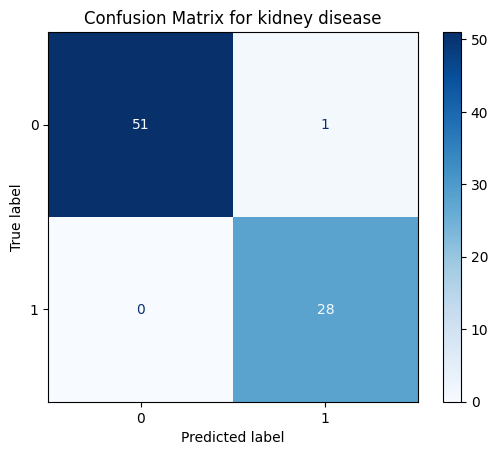

In [49]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test_k, y_pred_k, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for kidney disease")
plt.show()

In [50]:
#cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_kidney, y_kidney, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.925  0.9    0.9    0.9125 0.95  ]
Mean Accuracy: 0.9175000000000001


In [51]:
#roc-auc
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_k, y_pred_k)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)
print("Thresholds:", thresholds)


ROC AUC: 0.9903846153846153
Thresholds: [inf  1.  0.]


In [52]:
#save the model in joblib
import joblib
joblib.dump(model, 'kidney_model.joblib')


['kidney_model.joblib']

In [53]:
#save scalar file in joblib
import joblib
joblib.dump(scaler, 'minmax_scaler_kidney.joblib')

['minmax_scaler_kidney.joblib']

## LIVER DISEASE

In [54]:
#liver disease

# Load dataset
df_liver = pd.read_csv("liver_disease_clean.csv")

# Features & Target
X_liver = df_liver.drop('Dataset', axis=1)
y_liver = df_liver['Dataset']


# Train-Test Split
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_liver, y_liver, test_size=0.2, random_state=42,stratify= y_liver)

# Scaling
scaler = MinMaxScaler()
X_liver_scaled = scaler.fit_transform(X_liver)
X_train_ls = scaler.transform(X_train_l)
X_test_ls = scaler.transform(X_test_l)

# Train & Evaluate
model = RandomForestClassifier()
model.fit(X_train_ls, y_train_l)
y_pred_l = model.predict(X_test_ls)

print("Liver Disease Model")
print("Accuracy:", accuracy_score(y_test_l, y_pred_l))
print(classification_report(y_test_l, y_pred_l))


Liver Disease Model
Accuracy: 0.7192982456140351
              precision    recall  f1-score   support

           0       0.54      0.21      0.30        33
           1       0.74      0.93      0.82        81

    accuracy                           0.72       114
   macro avg       0.64      0.57      0.56       114
weighted avg       0.68      0.72      0.67       114



In [55]:
#cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_liver, y_liver, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.72807018 0.73684211 0.69298246 0.60526316 0.74561404]
Mean Accuracy: 0.7017543859649122


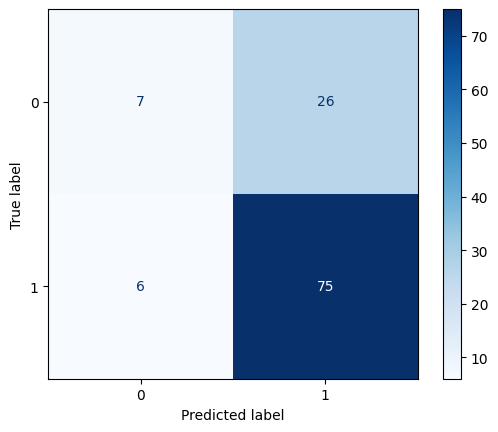

In [56]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test_l, y_pred_l, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)

## as it is imbalanced letz try xgboost, for this scaling no need

In [57]:
!pip install xgboost scikit-learn


Liver Disease Model
Accuracy: 0.7105263157894737
              precision    recall  f1-score   support

  Healthy(0)       0.50      0.30      0.38        33
  Disease(1)       0.76      0.88      0.81        81

    accuracy                           0.71       114
   macro avg       0.63      0.59      0.59       114
weighted avg       0.68      0.71      0.69       114

ROC AUC: 0.7164234942012719


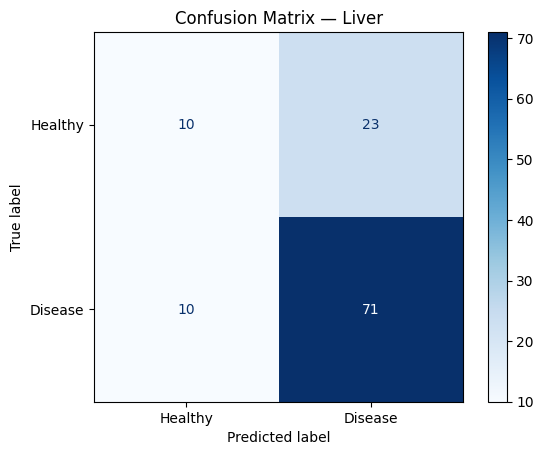

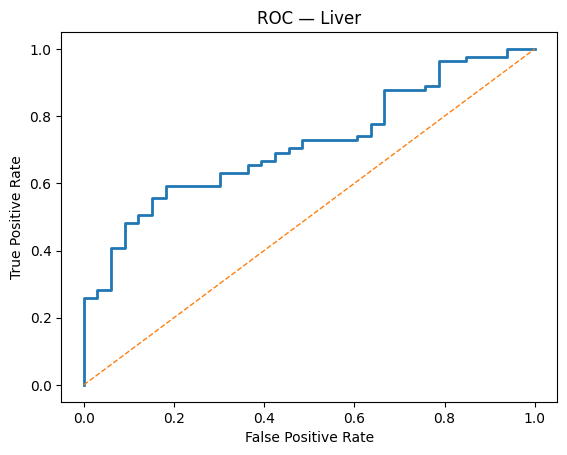

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

#load the dataset
df_liver = pd.read_csv("liver_disease_clean.csv")
# feature and target
X_liver = df_liver.drop('Dataset', axis=1)
y_liver = df_liver['Dataset'].astype(int)

#train test split
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_liver, y_liver, test_size=0.2, random_state=42,stratify= y_liver)

# 3) Handle imbalance with scale_pos_weight = (#neg / #pos)
pos = (y_train_l == 1).sum()
neg = (y_train_l == 0).sum()
spw = neg / pos if pos > 0 else 1.0

# 4) Train XGBoost (no scaling needed)
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=spw,      # helps reduce false positives when positives dominate
    n_estimators=400,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
)
model.fit(X_train_l, y_train_l)

# 5) Predict classes & probs
y_pred_l = model.predict(X_test_l)
y_proba_l = model.predict_proba(X_test_l)[:, 1]

# 6) Metrics
print("Liver Disease Model")
print("Accuracy:", accuracy_score(y_test_l, y_pred_l))
print(classification_report(y_test_l, y_pred_l, target_names=["Healthy(0)","Disease(1)"]))
print("ROC AUC:", roc_auc_score(y_test_l, y_proba_l))
# 7) Confusion matrix
cm = confusion_matrix(y_test_l, y_pred_l, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Healthy","Disease"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix — Liver")
plt.show()
# 8) ROC curve (optional visual)
fpr, tpr, thr = roc_curve(y_test_l, y_proba_l)
plt.plot(fpr, tpr, lw=2)
plt.plot([0,1],[0,1],'--', lw=1)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate"); plt.title("ROC — Liver")
plt.show()


In [59]:
#saving model
import joblib
joblib.dump(model, 'liver_model.joblib')

['liver_model.joblib']

### Parkinsons disease

In [60]:
# parkinsons disease
#Load dataset
df_parkinson = pd.read_csv("parkinsons_disease_clean.csv")

# Features & Target
X_park = df_parkinson.drop('status', axis=1)
y_park = df_parkinson['status'].astype(int)



# Train-Test Split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_park, y_park, test_size=0.2, random_state=42,stratify=y_park)

#imbalance handling
pos = (y_train_p == 1).sum()
neg = (y_train_p == 0).sum()
spw = neg / pos if pos > 0 else 1.0


# Train & Evaluate
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=spw,      # helps reduce false positives when positives dominate
    n_estimators=400,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_alpha=0.1,
    reg_lambda=0.1
)
model.fit(X_train_p, y_train_p)

y_pred_p = model.predict(X_test_p)

print("Parkinson’s Disease Model")
print("Accuracy:", accuracy_score(y_test_p, y_pred_p))
print(classification_report(y_test_p, y_pred_p))

Parkinson’s Disease Model
Accuracy: 0.8974358974358975
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39



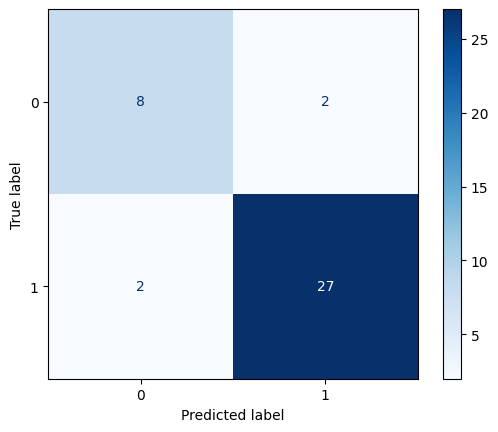

In [61]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test_p, y_pred_p, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)

In [62]:
import joblib
#save model

joblib.dump(model, 'parkinsons_model.joblib')

['parkinsons_model.joblib']

# Disease Prediction Project

This project aims to build classification models to predict three different diseases: Kidney Disease, Liver Disease, and Parkinson's Disease.

## Datasets

The project uses the following datasets:

-   `kidney_disease.csv`: Dataset for Kidney Disease prediction.
-   `indian_liver_patient.csv`: Dataset for Liver Disease prediction.
-   `parkinsons.csv`: Dataset for Parkinson's Disease prediction.

## Project Structure

The notebook is structured as follows:

1.  **Library Imports:** Importing necessary libraries for data manipulation, visualization, and machine learning.
2.  **Data Loading:** Loading the three datasets into pandas DataFrames.
3.  **Liver Disease Preprocessing and Model Training:**
    -   Handling missing values (imputation).
    -   Encoding categorical features.
    -   Dropping duplicates.
    -   Splitting data into training and testing sets.
    -   Scaling numerical features.
    -   Training a RandomForestClassifier model.
    -   Hyperparameter tuning using GridSearchCV.
    -   Evaluating the model using accuracy and classification report.
    -   Saving the trained model and scaler.
4.  **Kidney Disease Preprocessing and Model Training:**
    -   Handling missing values (imputation with median and mode).
    -   Replacing '?' with NaN and converting to numeric.
    -   Label encoding for binary categorical features and the target variable.
    -   Splitting data into training and testing sets.
    -   Scaling numerical features.
    -   Training a LogisticRegression model.
    -   Evaluating the model using accuracy and classification report.
    -   Saving the trained model and scaler.
5.  **Parkinson's Disease Preprocessing and Model Training:**
    -   Dropping the 'name' column as it's not a feature.
    -   Splitting data into training and testing sets.
    -   Scaling numerical features.
    -   Training an XGBoost Classifier model.
    -   Evaluating the model using accuracy and classification report.
    -   Saving the trained model and scaler.

## Setup and Usage

1.  Clone the repository.
2.  Install the required libraries: `pip install pandas numpy matplotlib seaborn scikit-learn xgboost joblib`
3.  Ensure the datasets (`kidney_disease.csv`, `indian_liver_patient.csv`, `parkinsons.csv`) are in the same directory as the notebook.
4.  Run the notebook cells sequentially.

## Results

The notebook includes the evaluation metrics (accuracy, classification report) for each trained model, demonstrating their performance on the respective disease prediction tasks.